In [ ]:
import string
import random
from random import randint
import cv2
import numpy as np
import os
from PIL import Image, ImageFont, ImageDraw
from matplotlib import pyplot as plt
import re
import math
import imutils

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def files_in_folder(folder_path):
  '''
  Returns a list of strings where each entry is a file in the folder_path.
  
  Parameters
  ----------
  
  folder_path : str
     A string to folder for which the file listing is returned.
     
  '''
  files_A = !ls "{folder_path}"
  # The files when listed from Google Drive have a particular format. They are
  # grouped in sets of 4 and have spaces and tabs as delimiters.
  
  # Split the string listing sets of 4 files by tab and space and remove any 
  # empty splits.
  files_B = [list(filter(None, re.split('\t|\s', files))) for files in files_A]
  
  # Concatenate all splits into a single sorted list
  files_C = []
  for element in files_B:
    files_C = files_C + element
  files_C.sort()
  
  return files_C

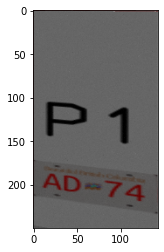

In [ ]:
# File Paths for Paul
# filePath = "/content/drive/MyDrive/MI_ENPH353/Media/Made_Plates/" 
#filePathReal = '/content/drive/MyDrive/MI_ENPH353/Media/Real_Plates'

# File Paths for Steven
# filePath = "/content/drive/MyDrive/Media/Made_Plates/"
filePathReal = "/content/drive/MyDrive/Media/Real_Plates/"

# imgListPaths = files_in_folder(filePath)
imgListPathsReal = files_in_folder(filePathReal)

# imgset = [np.array(Image.open(f'{filePath}/{file}'))
#                     for file in imgListPaths[:]]

#Only using real plates
imgsetReal = [np.array(cv2.imread(f'{filePathReal}/{file}'))
                    for file in imgListPathsReal[:]]

# plt.imshow(imgset[0])
plt.imshow(imgsetReal[0])

#print("Loaded {:} images from folder:\n{}".format(imgset, filePath))

In [ ]:
# Returns Letters of Plate in an Array
def crop(imgset, i, Real_Plates):
  if(Real_Plates):
    thresh =imutils.resize(imgset[i], width=400)
    height_plate, width_plate,channels = thresh.shape
    crop_thresh2 = thresh[0:height_plate,(int)(width_plate/2):width_plate]
    crop_thresh1 = thresh[0:height_plate,0:(int)(width_plate/2)]
    char1 = crop_thresh1[(int)(65*height_plate/100):height_plate,0:(int)(width_plate/4)]
    char2 = crop_thresh1[(int)(65*height_plate/100):height_plate,(int)(width_plate/4):(int)(width_plate/2)]
    char3 = crop_thresh2[(int)(65*height_plate/100):height_plate,0:(int)(width_plate/4)]
    char4 = crop_thresh2[(int)(65*height_plate/100):height_plate,(int)(width_plate/4):(int)(width_plate/2)]
    
    char1_resize = cv2.resize(char1, (75,135), interpolation= cv2.INTER_LINEAR)
    char2_resize = cv2.resize(char2, (75,135), interpolation= cv2.INTER_LINEAR)
    char3_resize = cv2.resize(char3, (75,135), interpolation= cv2.INTER_LINEAR)
    char4_resize = cv2.resize(char4, (75,135), interpolation= cv2.INTER_LINEAR)

    return [char1_resize, char2_resize, char3_resize, char4_resize]
    
  else:
    height_plate, width_plate, c = imgset[i].shape
    crop_thresh2 = imgset[i][0:height_plate,(int)(width_plate/2):width_plate]
    crop_thresh1 = imgset[i][0:height_plate,0:(int)(width_plate/2)]
    char1 = crop_thresh1[(int)(70*height_plate/100):(int)(85*height_plate/100),0:(int)(width_plate/4)]
    char2 = crop_thresh1[(int)(70*height_plate/100):(int)(85*height_plate/100),(int)(width_plate/4):(int)(width_plate/2)]
    char3 = crop_thresh2[(int)(70*height_plate/100):(int)(85*height_plate/100),0:(int)(width_plate/4)]
    char4 = crop_thresh2[(int)(70*height_plate/100):(int)(85*height_plate/100),(int)(width_plate/4):(int)(width_plate/2)]
  
  return [char1, char2, char3, char4]

# Returns File Name Letters of Plate in an Array
def getAns(i, Real_Plates):

  if(Real_Plates):
    a = imgListPathsReal[i][2]
    b = imgListPathsReal[i][3]
    c = imgListPathsReal[i][4]
    d = imgListPathsReal[i][5]
  else:
    a = imgListPaths[i][2]
    b = imgListPaths[i][3]
    c = imgListPaths[i][4]
    d = imgListPaths[i][5]
    
  return [a, b, c, d] 

def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)]
    return Y

def convert(Yd):
  L = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R',
       'S','T','U','V','W','X','Y','Z','0','1','2','3','4','5','6','7','8','9']
  newData = []
  for i in range(0, len(Yd)):
    for j in range(0,len(L)):
      if (Yd[i] == L[j]):
        newData.append(j)

  return newData

def reset_weights(model):
    session = backend.get_session()
    for layer in model.layers: 
        if hasattr(layer, 'kernel_initializer'):
            layer.kernel.initializer.run(session=session)

['I', 'E', '4', '3']
135 75


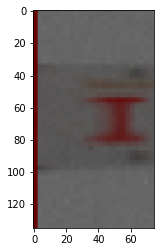

In [ ]:
# img1 = crop(imgset, 0, False)
img2 = crop(imgsetReal, 290, True)
# h, w, c = img1[0].shape
# plt.imshow(img1[0])
# print(getAns(0, False))
# print(h, w)

h, w, c = img2[1].shape
plt.imshow(img2[0])
print(getAns(290, True))
print(h, w)

In [ ]:
X_dataset_orig = []
Y_dataset_orig = []

# for i in range(0, len(imgset)):
#   letters = crop(imgset, i, False)
#   X_dataset_orig.append(letters[0])
#   X_dataset_orig.append(letters[1])
#   X_dataset_orig.append(letters[2])
#   X_dataset_orig.append(letters[3])

# for i in range(0, len(imgset)):
#   Ans = getAns(i, False)
#   Y_dataset_orig.append(Ans[0])
#   Y_dataset_orig.append(Ans[1])
#   Y_dataset_orig.append(Ans[2])
#   Y_dataset_orig.append(Ans[3])

for i in range(0, len(imgsetReal)):
  letters = crop(imgsetReal, i, True)
  X_dataset_orig.append(letters[0])
  X_dataset_orig.append(letters[1])
  X_dataset_orig.append(letters[2])
  X_dataset_orig.append(letters[3])

for i in range(0, len(imgsetReal)):
  Ans = getAns(i, True)
  Y_dataset_orig.append(Ans[0])
  Y_dataset_orig.append(Ans[1])
  Y_dataset_orig.append(Ans[2])
  Y_dataset_orig.append(Ans[3])

# Normalize X (images) dataset
X_dataset = np.array(X_dataset_orig)/255.

# Convert Y dataset to one-hot encoding
NUMBER_OF_LABELS = 36
Y_dataset_conv = convert(Y_dataset_orig)
Y_dataset = convert_to_one_hot(np.array(Y_dataset_conv), NUMBER_OF_LABELS)

In [ ]:
VALIDATION_SPLIT = 0

print("Total examples: {:d}\nTraining examples: {:d}\nTest examples: {:d}".
      format(X_dataset.shape[0],
             math.ceil(X_dataset.shape[0] * (1-VALIDATION_SPLIT)),
             math.floor(X_dataset.shape[0] * VALIDATION_SPLIT)))
print("X shape: " + str(X_dataset.shape))
print("Y shape: " + str(Y_dataset.shape))

Total examples: 5732
Training examples: 5732
Test examples: 0
X shape: (5732, 135, 75, 3)
Y shape: (5732, 36)


In [ ]:
# Use tensorflow 1.x so it's compatible with ROS Melodic
%tensorflow_version 1.14.0

from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend

def reset_weights(model):
    session = backend.get_session()
    for layer in model.layers: 
        if hasattr(layer, 'kernel_initializer'):
            layer.kernel.initializer.run(session=session)

conv_model = models.Sequential()
conv_model.add(layers.Conv2D(32, (3, 3), activation='relu',
                             input_shape=(135, 75, 3)))

#Other Layer Option
# conv_model.add(layers.MaxPooling2D((2, 2)))
# conv_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# conv_model.add(layers.MaxPooling2D((2, 2)))
# conv_model.add(layers.Flatten())
# conv_model.add(layers.Dropout(0.5))
# conv_model.add(layers.Dense(512, activation='relu'))
# conv_model.add(layers.Dense(36, activation='softmax'))


conv_model.add(layers.MaxPooling2D((2, 2)))
conv_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
conv_model.add(layers.MaxPooling2D((2, 2)))
conv_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
conv_model.add(layers.MaxPooling2D((2, 2)))
conv_model.add(layers.Conv2D(256, (3, 3), activation='relu'))
conv_model.add(layers.MaxPooling2D((2, 2)))
conv_model.add(layers.Flatten())
conv_model.add(layers.Dropout(0.5))
conv_model.add(layers.Dense(512, activation='relu'))
conv_model.add(layers.Dense(36, activation='softmax'))

conv_model.summary()

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.14.0`. This will be interpreted as: `1.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 133, 73, 32)       896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 66, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 17, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 30, 15, 128)       73856     
___________________________________________________

In [ ]:
LEARNING_RATE = 1e-3

conv_model.compile(loss='categorical_crossentropy',
                   optimizer=optimizers.Adam(lr=LEARNING_RATE),
                   metrics=['acc'])

reset_weights(conv_model)

history_conv = conv_model.fit(X_dataset[:], Y_dataset[:], 
                              validation_split=VALIDATION_SPLIT, 
                              epochs=80, 
                              batch_size=36)

Train on 5732 samples
Epoch 1/80
5732/5732 [==============================] - 6s 1ms/sample - loss: 3.1554 - acc: 0.1303
Epoch 2/80
5732/5732 [==============================] - 6s 977us/sample - loss: 1.0525 - acc: 0.6717
Epoch 3/80
5732/5732 [==============================] - 6s 975us/sample - loss: 0.3782 - acc: 0.8756
Epoch 4/80
5732/5732 [==============================] - 6s 969us/sample - loss: 0.2270 - acc: 0.9259
Epoch 5/80
5732/5732 [==============================] - 6s 970us/sample - loss: 0.1747 - acc: 0.9426
Epoch 6/80
5732/5732 [==============================] - 6s 967us/sample - loss: 0.1450 - acc: 0.9536
Epoch 7/80
5732/5732 [==============================] - 6s 964us/sample - loss: 0.1183 - acc: 0.9630
Epoch 8/80
5732/5732 [==============================] - 6s 962us/sample - loss: 0.0926 - acc: 0.9719
Epoch 9/80
5732/5732 [==============================] - 6s 961us/sample - loss: 0.0781 - acc: 0.9759
Epoch 10/80
5732/5732 [==============================] - 6s 964us/sampl

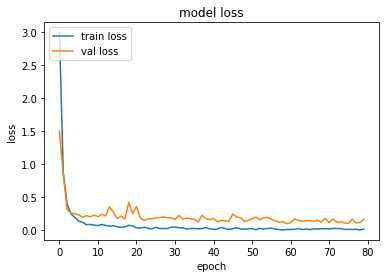

In [ ]:
plt.plot(history_conv.history['loss'])
plt.plot(history_conv.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'val loss'], loc='upper left')
plt.show()

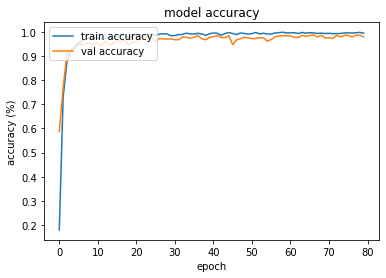

In [ ]:
plt.plot(history_conv.history['acc'])
plt.plot(history_conv.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy (%)')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'val accuracy'], loc='upper left')
plt.show()

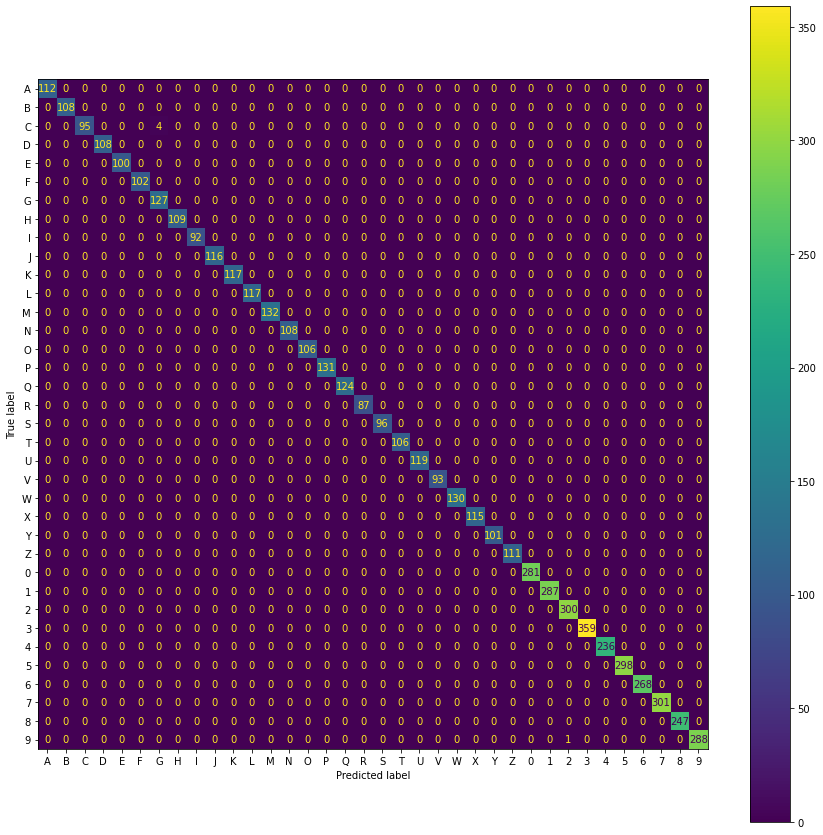

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true = Y_dataset[:]
y_pred = conv_model.predict(X_dataset[:])


def convertBack(Y_set):
  L = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R',
       'S','T','U','V','W','X','Y','Z','0','1','2','3','4','5','6','7','8','9']
  Y_new = []
  for vec in Y_set:
    #Find the index of largest value in the vec, which corresponds to the index of the answer in L
    x = np.argmax(vec)
    Y_new.append(L[x])
  
  return Y_new

y_pred_as_char = convertBack(y_pred)
y_true_as_char = convertBack(y_true)

CM = confusion_matrix(y_true_as_char, y_pred_as_char,labels=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','0','1','2','3','4','5','6','7','8','9'])

v = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R',
      'S','T','U','V','W','X','Y','Z','0','1','2','3','4','5','6','7','8','9'])

fig, axis = plt.subplots(figsize=(15,15))      
v.plot(ax=axis)


In [ ]:
y_true = Y_dataset[-1:]
y_pred = conv_model.predict(X_dataset[-1:])
y_pred

array([[6.1618635e-21, 6.6432945e-30, 1.8855712e-24, 1.0143429e-21,
        1.9710150e-34, 7.5187998e-15, 9.5035478e-26, 5.0429119e-17,
        9.7346605e-21, 1.9194027e-18, 1.4526477e-27, 3.9948000e-32,
        3.4938109e-20, 4.8110956e-26, 2.2597915e-24, 2.0967797e-14,
        1.5040335e-21, 5.0048082e-19, 7.6087307e-16, 8.8802206e-15,
        3.7154026e-33, 1.8261237e-23, 1.0922611e-21, 1.3972520e-14,
        2.7074570e-15, 1.5182020e-14, 9.4970396e-23, 8.6546924e-27,
        3.5573407e-21, 2.2574246e-22, 5.0201548e-22, 1.4975267e-25,
        5.9692808e-27, 1.0000000e+00, 8.7256916e-29, 6.7893438e-14]],
      dtype=float32)

In [ ]:
# Model save package
# !pip install ‘h5py=2.10.0’ --force-reinstall
!pip install h5py==2.10.0

     |████████████████████████████████| 2.9 MB 4.2 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0


In [ ]:
# Save the model
conv_model.save('/content/drive/MyDrive/my_model.h5')


In [ ]:
# import tensorflow as tf
# from tensorflow import keras

# checkModel = tf.keras.models.load_model('/content/drive/MyDrive/my_model.h5')

#y_true = Y_dataset
import os
for impath in os.listdir('/content') :
    if ".png" in impath:
        print(impath)
        path = "/content/"+impath
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)/255.
        img = np.array(Image.open(path))/255.
        # img = X_dataset[33]
        plt.imshow(img)
        X_do = []
        X_do.append(img)
        X_d = np.array(X_do)


        # X_d shape = (1, 135, 75, 3)
        print(X_d.shape)
        y_pred = conv_model.predict(X_d)

        # print(y_pred)
        def convertBack(Y_set):
          L = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R',
              'S','T','U','V','W','X','Y','Z','0','1','2','3','4','5','6','7','8','9']
          Y_new = []
          print(Y_set)
          for vec in Y_set:
            #Find the index of largest value in the vec, which corresponds to the index of the answer in L
            x = np.argmax(vec)
            Y_new.append(L[x])
          
          return Y_new

        y_pred_as_char = convertBack(y_pred)
        print(y_pred_as_char)
        # y_true_as_char = convertBack(y_true)

        # CM = confusion_matrix(y_true_as_char, y_pred_as_char,labels=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','0','1','2','3','4','5','6','7','8','9'])

        # v = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R',
        #       'S','T','U','V','W','X','Y','Z','0','1','2','3','4','5','6','7','8','9'])

        # fig, axis = plt.subplots(figsize=(15,15))      
        # v.plot(ax=axis)
        # a = input()
        plt.show()
